<a href="https://colab.research.google.com/github/solomonkimunyu/Deep-learning/blob/master/Computer_Vision_Instructional_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision

## How to Computer Vision:

With Machine Learning of course!

![](https://imgs.xkcd.com/comics/machine_learning.png)

Maybe Deep Learning?

![](https://cdn-images-1.medium.com/max/720/1*fRctlHDweu2foq6bBmzCgA.png =100x)



```
>>> print(computer_vision == conv_nets)
False
```



But, as we've seen, there's a whole branch of work that did this with traditional methods. Today, we will work through some things that are important to know about computer vision, especially with respect to Duckietown.

## Numpy Tutorial and Introduction

Images can be represented as **matrices** (2D arrays) or 3D **tensors** (in order to get RGB channels). [OpenCV](https://opencv.org/), a popular Computer Vision package, is a great tool to work with images, and provides a lot really useful tools that you can use to edit, transform, and work with your images. Python's OpenCV is actually a **wrapper** on top of the C/C++ implementation of the library, which makes it really fast. In addition, everything in OpenCV can be converted to and from [Numpy](http://www.numpy.org/) arrays, a really nice way to work with multidimensional objects like matrices and tensors. Like OpenCV, all Python calls to the Numpy library actually get converted and executed into C, which makes it really fast as well.

As we work through things like camera matrices, calibration, homography matrices, etc, it'll be important to know how to work with these libraries, and understand what you can (and can't do with them).


In [ ]:
!wget "https://www.duckietown.org/wp-content/uploads/2018/05/duckietown_nice-1024x683.jpg" -O dt.jpg
    
# np = common abbreviation for numpy
import numpy as np

# Constructing a numpy array from a list

boring_list = [1, 2, 3]
fun_array = np.array(boring_list) # Calling np.array(a_list) will cast your list into a numpy array!

# Arrays can be added, and there are tons of convenient functions to make them
ones = np.ones(3)
result = fun_array + ones + np.zeros(3)

print(result)

# What about matrices?
boring_mtx = [[1, 2], [3, 4]]
ones = np.ones((2, 2)) # (2, 2) describes the shape that I want
identity = np.eye(2) # an Identity matrix

# Numpy will cast your lists into arrays if need be
try:
    result = boring_mtx + identity 
    print(result)
except:
    print("Can I do this?")
    
# Random Sampling? No problem!
rando_mtx = np.random.random((100, 100))

# A lot of functions built in
print(np.linalg.norm(rando_mtx))

# But different behavior depending on the parameters you give it!
print(np.linalg.norm(rando_mtx, axis=0))
print(np.linalg.norm(rando_mtx, ord=2))

# Matrix Operations work exactly how you think they would
rando_mtx = np.eye(rando_mtx.shape[0]) * rando_mtx


# Or not? One big (and subtle) feature: broadcasting
rando_mtx += 1 # adding a scalar works, that's cool! 

mtx1 = np.random.random((8, 1, 7, 1))
mtx2 = np.random.random((8, 2, 1, 9))

# No error? 
res = mtx1 * mtx2 

# Does the same? 
res2 = mtx1.dot(mtx2)

print(np.array_equal(res, res2), res.shape, res2.shape)

# Big takeaway: numpy docs are your friend! Look before you write!



Redirecting output to ‘wget-log’.
[2. 3. 4.]
[[2. 2.]
 [3. 5.]]
58.112263252949795
[6.03437972 5.94978744 5.79004413 5.34186019 6.08110952 5.59331948
 5.66200444 5.38528576 5.95109992 5.77866825 5.59552175 5.84784363
 6.02371157 5.0723352  5.83161062 5.82737532 5.89762943 5.57580032
 5.89565875 5.45763693 5.93029704 5.86077252 5.90591149 5.65315521
 5.58739879 5.54426389 5.96071012 5.98063801 6.24584695 6.04703248
 6.39441345 5.99878922 6.14805434 5.67493838 5.77014704 5.62603652
 5.5374674  5.70119607 5.82983745 5.4856553  5.91719597 5.75217189
 5.97669828 6.3547723  5.72967771 5.73430768 5.45160271 6.21162852
 5.72204962 5.87256107 6.10805231 5.54740969 5.7127643  5.999244
 5.89068993 5.73035706 6.17467779 5.86419031 5.83596524 5.68117223
 5.77509919 5.76663751 5.87248299 6.01652062 6.01944208 5.96414831
 5.89553897 5.73013282 5.46111555 5.80875424 5.69174341 5.70240295
 5.54163707 6.15753041 5.81028411 5.66977167 5.54770313 5.660924
 6.15381567 5.93434111 5.83274852 5.88202753 5.47

## OpenCV


<class 'numpy.ndarray'>


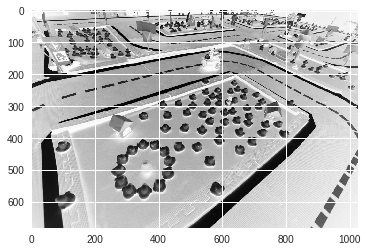

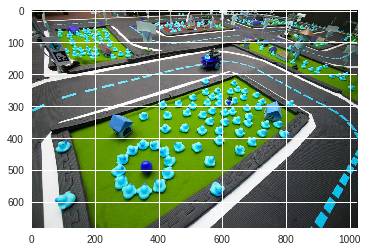

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2

# Load in Grayscale
img = cv2.imread('./dt.jpg', 0)

# The underlying representation is a numpy array!
print(type(img))

plt.imshow(img)
plt.show()

img = cv2.imread('./dt.jpg')

plt.imshow(img)
plt.show()

# This would work normally, but it will crash the colab kernel, so don't.
# cv2.imshow('Image', img)


Notice anything different about the above image? You'll see that the colors are off - this is because OpenCV uses a BGR ordering of their image channels, whereas when you want to plot in something other than OpenCV, you'll need to convert it. In Colab, you cannot use the standard OpenCV 'imshow' function, so we use matplotlib.

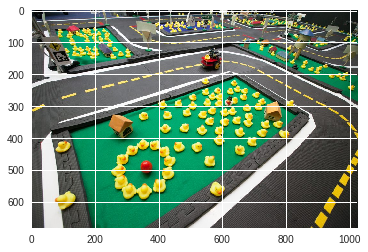

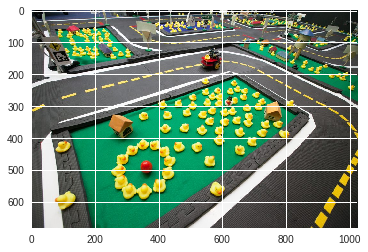

In [ ]:
imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(imgrgb)
plt.show()

# Or, use fun numpy functions / indexing!
imgrgb = img[:,:,::-1]
plt.imshow(imgrgb)
plt.show()


### Common Image Manipulations

OpenCV is super useful for doing lots of image transformations, and we will experiment with some of the basic ones below. 

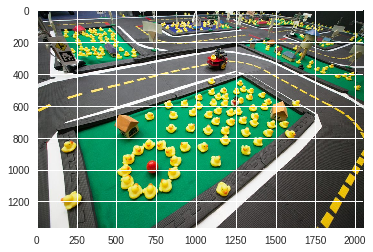

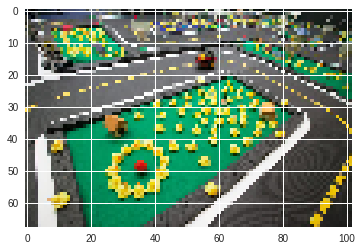

In [ ]:
# Expanding
res = cv2.resize(imgrgb, None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
plt.imshow(res)
plt.show()

# Shrinking
res = cv2.resize(imgrgb, None,fx=.1, fy=.1, interpolation = cv2.INTER_CUBIC)
plt.imshow(res)
plt.show()

# What are some practical constraints that have to do with image resizing?

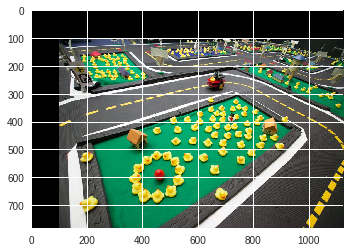

In [ ]:
#@title Transformation Parameters { run: "auto" }

theta_degrees = 0 #@param {type:"slider", min:0, max:360, step:10}
shift_x = 100 #@param {type:"slider", min:-100, max:100, step:2}
shift_y = 100 #@param {type:"slider", min:-100, max:100, step:2}

# We can also play around with rotations by defining our M matrix, 
# which has the form:
"""
| cos(theta) -sin(theta) tx | 
| sin(theta)  cos(theta) ty |
"""

rows, cols, _ = imgrgb.shape

radians = theta_degrees * np.pi / 180
M = [
        [np.cos(radians), -np.sin(radians), shift_x], 
        [np.sin(radians),  np.cos(radians), shift_y]
    ]

M = np.array(M)
rows += int(shift_x)
cols += int(shift_y)

res = cv2.warpAffine(imgrgb, M, (cols,rows))

plt.imshow(res)
plt.show()




### (Slightly) Advanced Image Manipulation Techniques

For certain tasks (i.e object detection), the image needs to be processed before it is fed into our module, for better results. Here, we go over some advanced image manipulation techniques.

Things like blurring, smoothing, and thresholding can be useful for things where we can make strong assumptions. For example, when we know our lane markings will be white, we can threshold our image pixels to filter out the values that aren't close enough to "white", which is represented (in RGB / BGR) as (255, 255, 255)

You can also do things like Background Subtraction, which will expose differences in between frames.

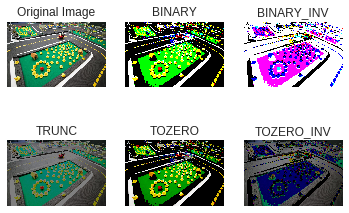

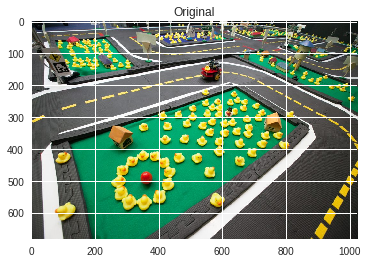

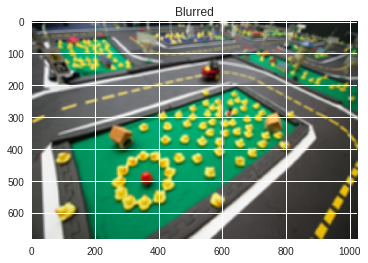

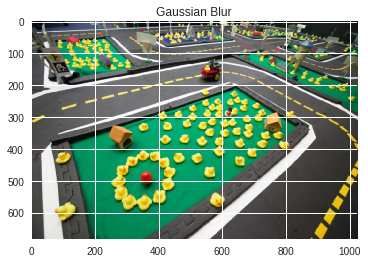

In [ ]:
# make things easier!
img = imgrgb

# Thresholding is cool
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

# Blurring - smoothes the image out
blur = cv2.blur(img,(10, 10))
gblur = cv2.GaussianBlur(imgrgb,(5,5),0)

plt.imshow(img), plt.title('Original')
plt.show()
plt.imshow(blur), plt.title('Blurred')
plt.show()
plt.imshow(gblur),plt.title('Gaussian Blur')
plt.show()
